In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Leer el archivo Parquet en un DataFrame de Pandas
df = pd.read_parquet('data/data.parquet')

In [2]:
df

,index,station_id,houryear,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,...,dayofweek,time2,Rain,Rain_Lectura,year,dayyear,Wind,Wind_Lectura,AñoMes,traffic
0,0,1,2081,16.000000,16.000000,0.0,14.0,1.0,1.0,1.0,...,3,2019-03-28,0,0.0,2019,87,0,6.6,201903,NaN
1,4665,70,2081,21.000000,21.000000,0.0,5.0,1.0,1.0,1.0,...,3,2019-03-28,0,0.0,2019,87,0,6.6,201903,NaN
2,29692,425,2081,27.000000,27.000000,0.0,0.0,1.0,1.0,1.0,...,3,2019-03-28,0,0.0,2019,87,0,6.6,201903,NaN
3,4741,71,2081,18.000000,18.000000,0.0,3.0,1.0,1.0,1.0,...,3,2019-03-28,0,0.0,2019,87,0,6.6,201903,NaN
4,22422,316,2081,25.000000,25.000000,0.0,1.0,1.0,1.0,1.0,...,3,2019-03-28,0,0.0,2019,87,0,6.6,201903,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15006278,288553,398,8759,3.000000,3.000000,0.0,32.0,1.0,1.0,1.0,...,5,2022-12-31,0,0.0,2022,365,0,8.6,202212,NaN
15006279,144282,204,8759,14.000000,12.000000,2.0,18.0,1.0,1.0,1.0,...,5,2022-12-31,0,0.0,2022,365,0,8.6,202212,NaN
15006280,2975,4,8759,19.000000,19.000000,0.0,2.0,1.0,1.0,1.0,...,5,2022-12-31,0,0.0,2022,365,0,8.6,202212,NaN
15006281,129428,183,8759,21.666667,14.666667,7.0,9.0,1.0,1.0,1.0,...,5,2022-12-31,0,0.0,2022,365,0,8.6,202212,NaN


### Selección de características y modificacion del df

In [4]:
#Variables globales
seed = 42
batch_size = 32
epochs = 10

# Selección de variables explicativas y explicada
features = ['station_id','num_bikes_available', 'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike',
            'num_docks_available', 'hour', 'year','dayofweek', 'Rain', 'Wind']
target = ['num_docks_available']

# train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar Análisis de Componentes Principales
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Definicion de la red neuronal, compilacion y entrenamiento del modelo

In [7]:
# Modelo. No he compilado el dropout ( es para que no haga overfitting)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
#model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test_pca, y_test))

Epoch 1/10
375158/375158 [==============================] - 1084s 3ms/step - loss: 5.5643 - val_loss: 1.5105
Epoch 2/10
375158/375158 [==============================] - 1065s 3ms/step - loss: 1.5231 - val_loss: 1.3181
Epoch 3/10
375158/375158 [==============================] - 1066s 3ms/step - loss: 1.4448 - val_loss: 1.5037
Epoch 4/10
375158/375158 [==============================] - 1037s 3ms/step - loss: 1.3937 - val_loss: 1.3091
Epoch 5/10
375158/375158 [==============================] - 1012s 3ms/step - loss: 1.3532 - val_loss: 1.2960
Epoch 6/10
375158/375158 [==============================] - 1062s 3ms/step - loss: 1.3283 - val_loss: 1.3556
Epoch 7/10
375158/375158 [==============================] - 766s 2ms/step - loss: 1.3108 - val_loss: 1.2017
Epoch 8/10
375158/375158 [==============================] - 1013s 3ms/step - loss: 1.2938 - val_loss: 1.2754
Epoch 9/10
375158/375158 [==============================] - 1066s 3ms/step - loss: 1.2821 - val_loss: 1.2984
Epoch 10/10
375158/3

### Prediccion y evaluacion

In [13]:
# Prediccion
predictions = model.predict(X_test_pca)

93790/93790 [==============================] - 118s 1ms/step


In [14]:
# Evaluación
score = model.evaluate(X_test_pca, y_test, verbose=0)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Pérdida en el conjunto de prueba:", score)
print('MSE:', mse)
print('R^2:', r2)

Pérdida en el conjunto de prueba: 1.2247051000595093
MSE: 1.224698544288054
R^2: 0.9829116742997238


### Comparar las predicciones con los valores reales

In [20]:
# Crear un DataFrame con las predicciones y las etiquetas reales
df_predictions = pd.DataFrame({'Predicciones': predictions.flatten(), 'Valores Reales': y_test.values.flatten()})
df_predictions

,Predicciones,Valores Reales
0,16.927689,17.000000
1,14.377191,14.333333
2,24.906567,25.000000
3,18.114622,18.083333
4,14.112436,14.000000
...,...,...
3001252,21.929138,22.083333
3001253,20.010042,20.076923
3001254,4.668244,4.500000
3001255,5.339419,5.083333


### Análisis descriptivo

In [22]:
describe_results = df_predictions.describe()
describe_results

,Predicciones,Valores Reales
count,3.001257e+06,3.001257e+06
mean,1.556742e+01,1.555781e+01
std,8.312576e+00,8.465740e+00
min,-1.156433e+00,0.000000e+00
25%,9.306119e+00,9.166667e+00
50%,1.586030e+01,1.600000e+01
75%,2.174655e+01,2.191667e+01
max,5.600591e+01,9.900000e+01


### Visualización de resultados

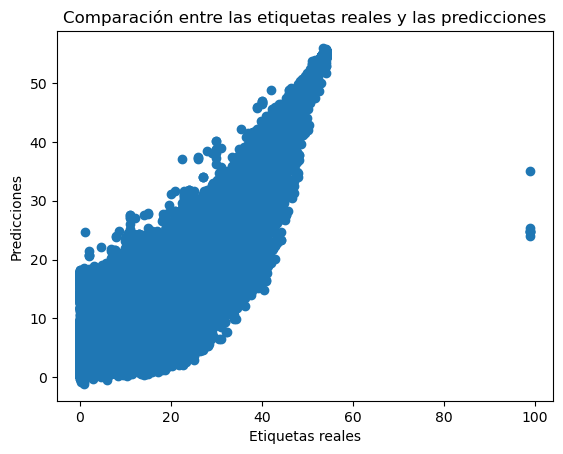

In [23]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a las etiquetas reales
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre las etiquetas reales y las predicciones')
plt.show()